In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('Online_Retail.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### información preeliminar

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [65]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [66]:
#Datos faltantes
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [67]:
#datos duplicados
data.duplicated().sum()

5268

In [68]:
#Valores únicos
unique_values = {col: data[col].unique() for col in data.columns} # Un diccionario que a cada col le asigna un array con sus valores únicos
for col, values in unique_values.items():
    print(f'columna: {col}')
    print(f'Número de valores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}')
    print('-'*100)

columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
----------------------------------------------------------------------------------------------------
columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
----------------------------------------------------------------------------------------------------
columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
------------------------------------------------------------------------------------------------

### Limpieza de datos

In [69]:
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [70]:
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [71]:
data_cleaned.duplicated().sum()

0

In [72]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Transformaciones de datos para análisis

In [73]:
data_cleaned['TotalAmount'] = data_cleaned['Quantity']*data_cleaned['UnitPrice']

In [74]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [75]:
#Transformación de la fecha para trabajar series de tiempo
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

/tmp/ipykernel_4456/709178274.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


In [76]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

In [77]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [78]:
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [79]:
data_cleaned['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [80]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 1 if x<=6 else 2)

In [81]:
sales_by_semester = data_cleaned.groupby(['Year','Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

### Graficando los datos

In [82]:
#Revisamos las devoluciones
total_return = len(data_cleaned[data_cleaned['Quantity']<0])
total_return

8872

In [83]:
#Total de no devoluciones
total_no_returns = len(data_cleaned[data_cleaned['Quantity']>=0])
total_no_returns

392732

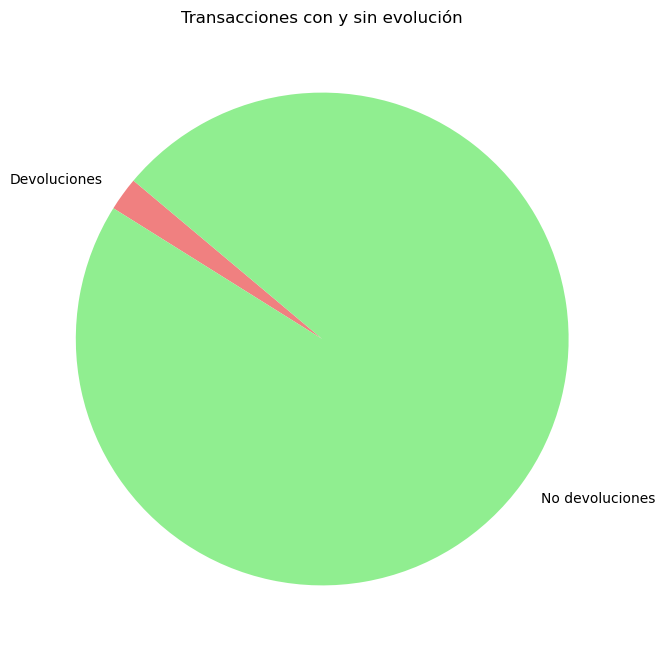

In [88]:
labels = ['Devoluciones', 'No devoluciones']
sizes = [total_return, total_no_returns]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels = labels, colors = colors, startangle=140)
plt.title('Transacciones con y sin evolución')
plt.show()

In [89]:
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif amount <= 20 < 100:
        return 'Medium'
    else: 
        return 'High'

In [98]:
data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,High


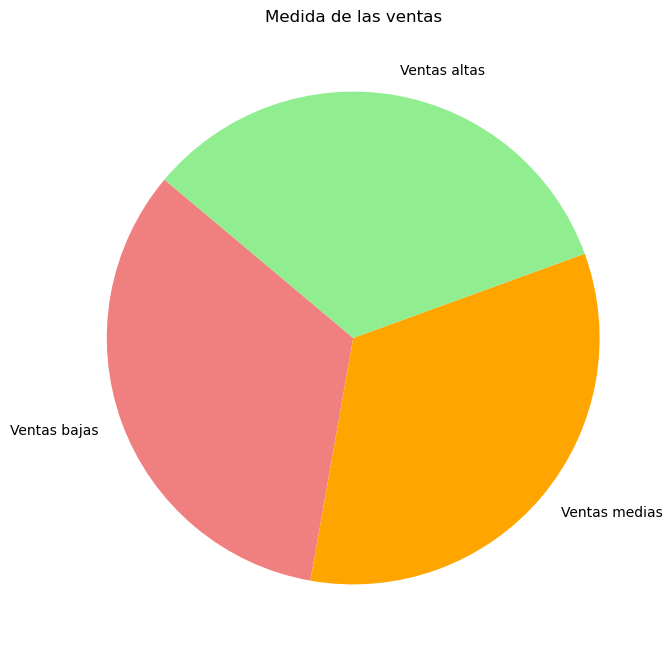

In [108]:
plt.figure(figsize=(8,8))
plt.pie([len(data_cleaned['AmountCategory'] == 'Low'), len(data_cleaned['AmountCategory'] == 'Medium'), len(data_cleaned['AmountCategory'] == 'High')],
        colors = ['lightcoral', 'orange', 'lightgreen'],labels = ['Ventas bajas','Ventas medias','Ventas altas'], startangle=140)
plt.title('Medida de las ventas')
plt.show()

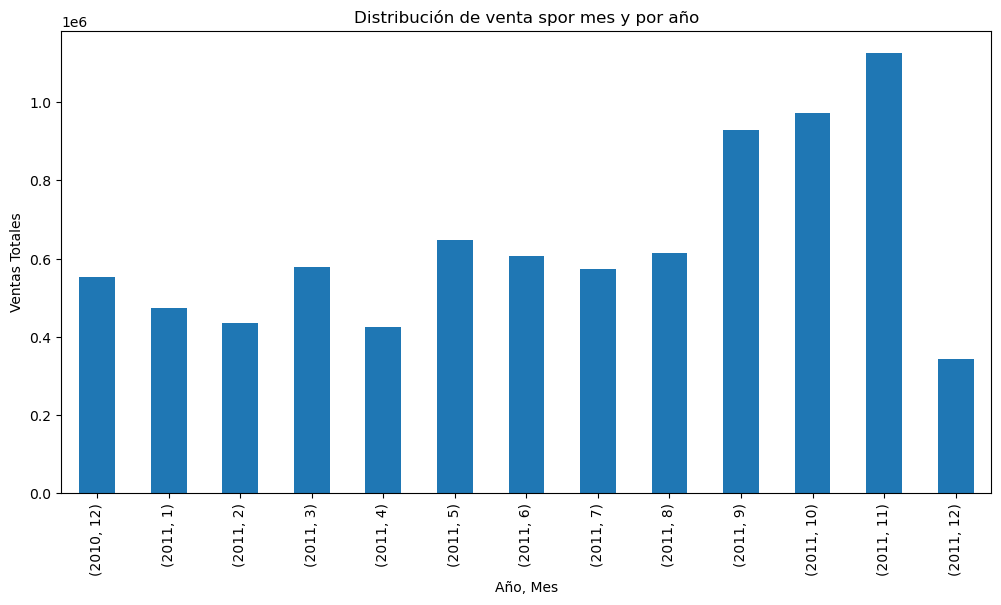

In [110]:
plt.figure(figsize = (12,6))
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind = 'bar')
plt.title('Distribución de venta spor mes y por año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas Totales')
plt.show()

In [112]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                       on = 'StockCode', how = 'left')

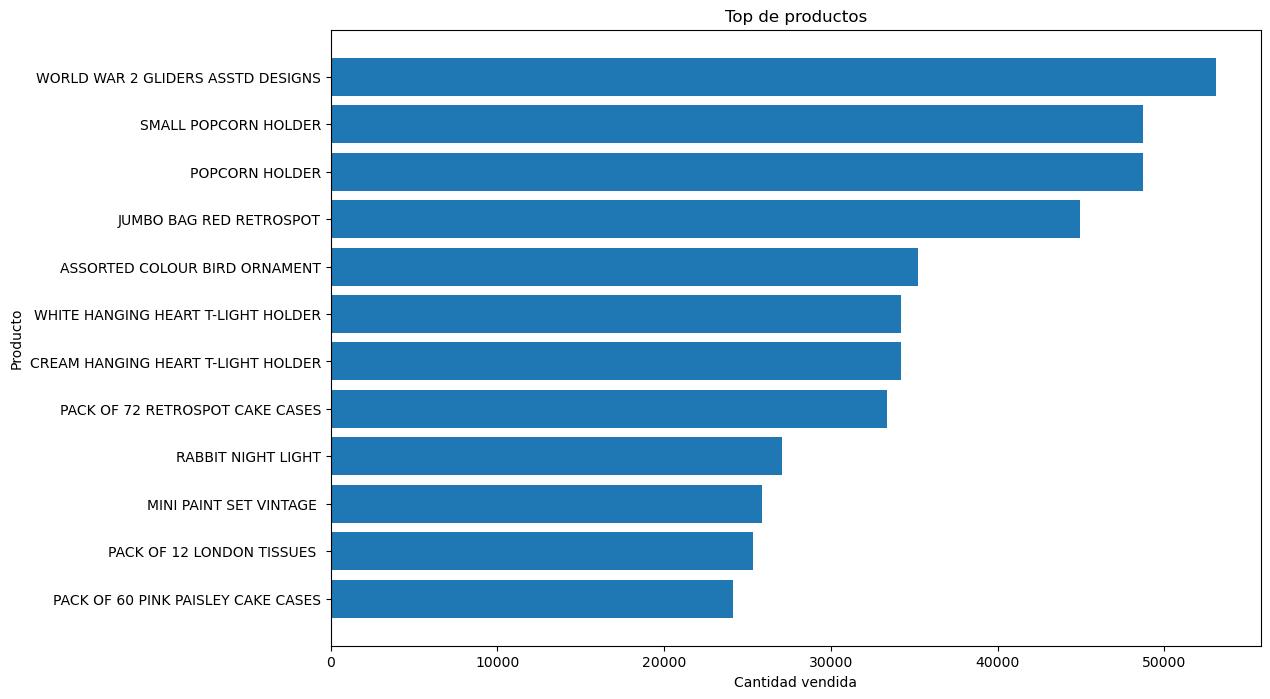

In [121]:
plt.figure(figsize = (12,8))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top de productos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()